In [3]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import random

In [4]:
lang_tensor = {}
languages = ['de', 'it', 'en', 'es']

for lang in languages:

    lang_tensor[lang] = torch.load(
        f'/om2/user/moshepol/prosody/data/low_pass/{lang}/spect/train/range_5_5-6_0/batch_00000_64.pt',
        weights_only = True,
        )[random.randint(0, 64)].numpy()

In [5]:
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

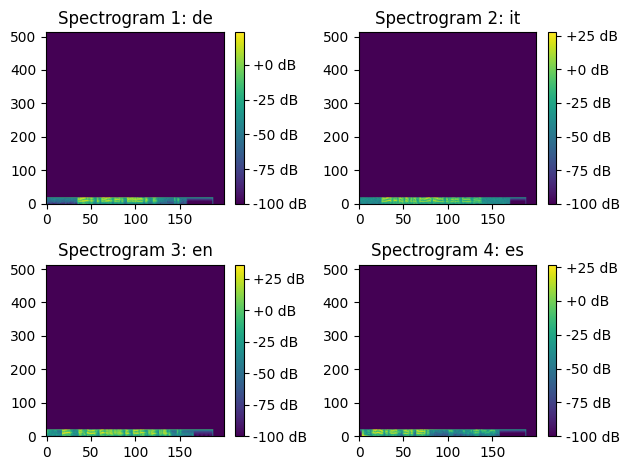

In [11]:
target_shape = (513, 200)

for i, (lang, spec) in enumerate(lang_tensor.items()):
    plt.subplot(2, 2, i+1)  # 2 rows, 2 columns, i+1-th subplot

    padded = np.full(target_shape, -100, dtype=spec.dtype)

    # Copy original data into the top-left corner
    padded[:spec.shape[0], :spec.shape[1]] = spec

    plt.imshow(padded, aspect="auto", origin="lower", cmap="viridis")

    plt.title(f"Spectrogram {i+1}: {lang}")
    plt.colorbar(format="%+2.0f dB")
    plt.tight_layout()

plt.show()